<a href="https://colab.research.google.com/github/Shailajgautam/FDV-AI-Intern-Task/blob/main/Intern_Week_2_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI Internship Week-2 Task-1:**




# **Importing Required Dependencies**

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


# **Importing CSV File**

In [199]:
df = pd.read_csv("/content/sample_data/cardio.csv")

# **Visualizing the Data**

In [200]:
# Display the first few rows of the DataFrame
print(df.head())

  id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0              0;18393;2;168;62.0;110;80;1;1;0;0;1;0                               
1              2;18857;1;165;64.0;130;70;3;1;0;0;0;1                               
2             3;17623;2;169;82.0;150;100;1;1;0;0;1;1                               
3              4;17474;1;156;56.0;100;60;1;1;0;0;0;0                               
4              8;21914;1;151;67.0;120;80;2;2;0;0;0;0                               


In [201]:
# Check the shape of the DataFrame
print(df.shape)


(69997, 1)


In [202]:
# Get an overview of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69997 entries, 0 to 69996
Data columns (total 1 columns):
 #   Column                                                                             Non-Null Count  Dtype 
---  ------                                                                             --------------  ----- 
 0   id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio  69997 non-null  object
dtypes: object(1)
memory usage: 547.0+ KB
None


# **Cleaning the data**

In [203]:
# Split the columns and expand them into separate columns
df_split = df["id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio"].str.split(";", expand=True)

# Define column names
column_names = ["id", "age", "gender", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"]

# Rename the columns
df_split.columns = column_names

# Convert data types
df_cleaned = df_split.astype({"id": int, "age": int, "gender": int, "height": int, "weight": float,
                              "ap_hi": int, "ap_lo": int, "cholesterol": int, "gluc": int,
                              "smoke": int, "alco": int, "active": int, "cardio": int})

# Print first few rows of cleaned DataFrame to verify
print(df_cleaned.head())


   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   2  18857       1     165    64.0    130     70            3     1      0   
2   3  17623       2     169    82.0    150    100            1     1      0   
3   4  17474       1     156    56.0    100     60            1     1      0   
4   8  21914       1     151    67.0    120     80            2     2      0   

   alco  active  cardio  
0     0       1       0  
1     0       0       1  
2     0       1       1  
3     0       0       0  
4     0       0       0  


**Cleaning Age**

In [204]:
# Convert age from days to years
df_cleaned['age'] = df_cleaned['age'] // 365.25

# Print first few rows of age column to verify
print(df_cleaned['age'].head())


0    50.0
1    51.0
2    48.0
3    47.0
4    59.0
Name: age, dtype: float64


In [205]:
# Sort the DataFrame by 'id' column
df_cleaned = df_cleaned.sort_values(by='id')

# Print unique values for each column
for column in df_cleaned.columns:
    unique_values = df_cleaned[column].unique()
    print(f"Column: {column}")
    print(unique_values)
    print()


Column: id
[    0     2     3 ... 99996 99998 99999]

Column: age
[50. 51. 48. 47. 59. 60. 54. 61. 40. 45. 58. 63. 64. 39. 53. 49. 57. 56.
 55. 46. 43. 62. 52. 42. 41. 44. 29. 30.]

Column: gender
[2 1]

Column: height
[168 165 169 156 151 157 158 164 173 172 170 154 162 163 153 159 166 155
 160 175 178 171 152 187 148 179 180 188 185 167 183 174 176 161 184 177
 182  76 149 142 150 181 144 147 186 146 141 195 140 198 145 143 196 138
 194 190 134 136 100 120 189 137 192 122 250 191 117  70  97 119 130 110
 193  75 132  71 135  67 125 139 133  74  98 112 207  68  55  81  80  64
  91  60 109  72 197  65 128 105 108 200 104 111 113  96 131  59  66  99
  57]

Column: weight
[ 62.    64.    82.    56.    67.    93.    71.    68.    80.    60.
  78.   112.    75.    52.    83.    69.    90.    45.    65.    59.
  66.    74.   105.    73.    55.    95.    70.    72.    63.    50.
 107.    84.    85.    77.    79.    76.    58.   115.    97.    53.
  57.    49.   110.    94.    92.    87.   10

**Cleaning ap_hi and ap_lo**

In [206]:
# Calculate the first quartile (Q1) and third quartile (Q3) for ap_hi
Q1_ap_hi = df_cleaned['ap_hi'].quantile(0.25)
Q3_ap_hi = df_cleaned['ap_hi'].quantile(0.75)

# Calculate the interquartile range (IQR) for ap_hi
IQR_ap_hi = Q3_ap_hi - Q1_ap_hi

# Define the lower and upper bounds to identify outliers for ap_hi
lower_bound_ap_hi = Q1_ap_hi - 1.5 * IQR_ap_hi
upper_bound_ap_hi = Q3_ap_hi + 1.5 * IQR_ap_hi

# Remove outliers for ap_hi
df_cleaned = df_cleaned[(df_cleaned['ap_hi'] >= lower_bound_ap_hi) & (df_cleaned['ap_hi'] <= upper_bound_ap_hi)]

# Calculate the first quartile (Q1) and third quartile (Q3) for ap_lo
Q1_ap_lo = df_cleaned['ap_lo'].quantile(0.25)
Q3_ap_lo = df_cleaned['ap_lo'].quantile(0.75)

# Calculate the interquartile range (IQR) for ap_lo
IQR_ap_lo = Q3_ap_lo - Q1_ap_lo

# Define the lower and upper bounds to identify outliers for ap_lo
lower_bound_ap_lo = Q1_ap_lo - 1.5 * IQR_ap_lo
upper_bound_ap_lo = Q3_ap_lo + 1.5 * IQR_ap_lo

# Remove outliers for ap_lo
df_cleaned = df_cleaned[(df_cleaned['ap_lo'] >= lower_bound_ap_lo) & (df_cleaned['ap_lo'] <= upper_bound_ap_lo)]


**Cleaning Weight**

In [207]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df_cleaned['weight'].quantile(0.25)
Q3 = df_cleaned['weight'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df_cleaned[(df_cleaned['weight'] >= lower_bound) & (df_cleaned['weight'] <= upper_bound)]

# Print unique values for 'weight' column after removing outliers
print("Column: weight")
print(df_cleaned['weight'].unique())


Column: weight
[ 62.    64.    82.    67.    93.    71.    80.    60.    78.    75.
  52.    68.    56.    83.    69.    90.    65.    59.    66.    74.
 105.    73.    55.    95.    70.    72.    50.   107.    84.    85.
  77.    79.    58.    97.    76.    53.    57.    49.    94.    92.
  87.   103.    88.   100.    61.    48.    54.    51.    63.    47.
  91.   104.    98.    81.    89.   101.    99.    86.    65.5   96.
  44.    64.8  106.    45.   102.    46.    43.    83.6  106.5   40.
  41.    62.3   89.5   84.6   82.3   67.9   67.5   74.3   60.2   64.5
  58.7   42.    80.8   92.2   75.6   68.9   72.5   70.5   74.2   84.3
  54.5   68.5   79.5   72.8   73.2   96.5   53.2   61.2   54.35  79.94
  62.4   70.3   60.5   69.8   64.7   64.1   59.5   75.5   78.2   82.5
  55.6   59.8   70.8   73.8   56.2   69.5   71.5   89.1   76.5   86.5
  63.8   70.2   68.4   66.5   65.3   62.2   61.5   80.5   81.1   53.6
  66.4   68.3   76.8   58.8   75.2   83.5   64.3   84.9   80.7   84.7
  60.1  105

# **Feature Engineering**

In [208]:


# Feature engineering: Body Mass Index (BMI)
df_cleaned['bmi'] = df_cleaned['weight'] / ((df_cleaned['height'] / 100) ** 2)

# Feature engineering: Blood Pressure Category
def categorize_blood_pressure(row):
    if row['ap_hi'] < 120 and row['ap_lo'] < 80:
        return 'Normal'
    elif 120 <= row['ap_hi'] < 130 and row['ap_lo'] < 80:
        return 'Elevated'
    elif 130 <= row['ap_hi'] < 140 or 80 <= row['ap_lo'] < 90:
        return 'Hypertension Stage 1'
    elif 140 <= row['ap_hi'] < 180 or 90 <= row['ap_lo'] < 120:
        return 'Hypertension Stage 2'
    else:
        return 'Hypertensive Crisis'

df_cleaned['bp_category'] = df_cleaned.apply(categorize_blood_pressure, axis=1)


In [209]:
# Check for missing values
print(df_cleaned.isnull().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
bmi            0
bp_category    0
dtype: int64


In [210]:
# Check for duplicate rows
print(df_cleaned.duplicated().sum())

0


In [211]:
# Print first few rows of cleaned DataFrame to verify
print(df_cleaned.head())

   id   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  50.0       2     168    62.0    110     80            1     1      0   
1   2  51.0       1     165    64.0    130     70            3     1      0   
2   3  48.0       2     169    82.0    150    100            1     1      0   
4   8  59.0       1     151    67.0    120     80            2     2      0   
5   9  60.0       1     157    93.0    130     80            3     1      0   

   alco  active  cardio        bmi           bp_category  
0     0       1       0  21.967120  Hypertension Stage 1  
1     0       0       1  23.507805  Hypertension Stage 1  
2     0       1       1  28.710479  Hypertension Stage 2  
4     0       0       0  29.384676  Hypertension Stage 1  
5     0       1       0  37.729725  Hypertension Stage 1  


# **Visualizing Cleaned Data**

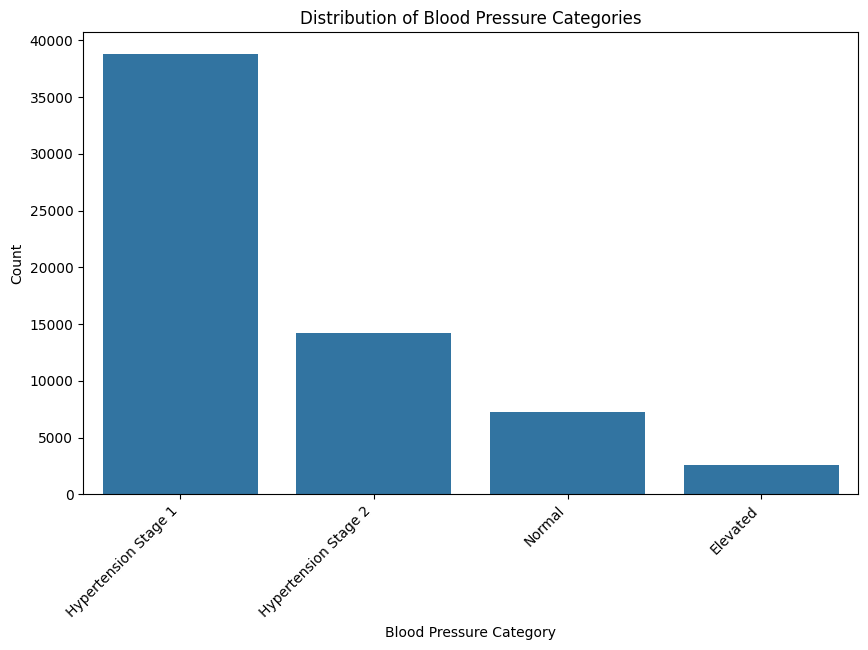

In [212]:
# Create a count plot for the blood pressure categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='bp_category')
plt.title('Distribution of Blood Pressure Categories')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

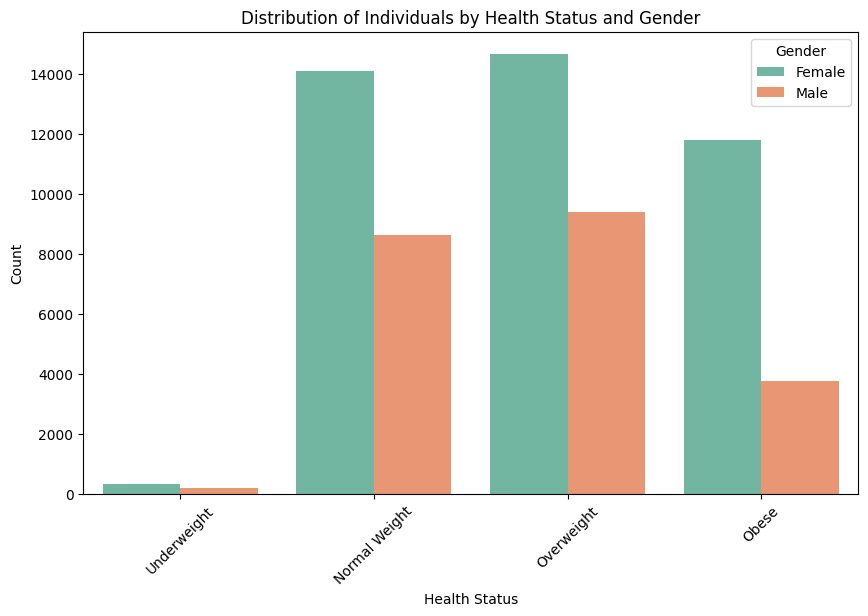

In [213]:

# Define a function to classify BMI into healthy or unhealthy categories
def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal Weight'
    elif 24.9 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

# Apply the function to create a new column indicating health status
df_cleaned['health_status'] = df_cleaned['bmi'].apply(classify_bmi)

# Plot a graph to distinguish between unhealthy people for both females and males
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='health_status', hue='gender', data=df_cleaned, palette='Set2',
                   order=['Underweight', 'Normal Weight', 'Overweight', 'Obese'])  # Ensure correct order
plt.title('Distribution of Individuals by Health Status and Gender')
plt.xlabel('Health Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()


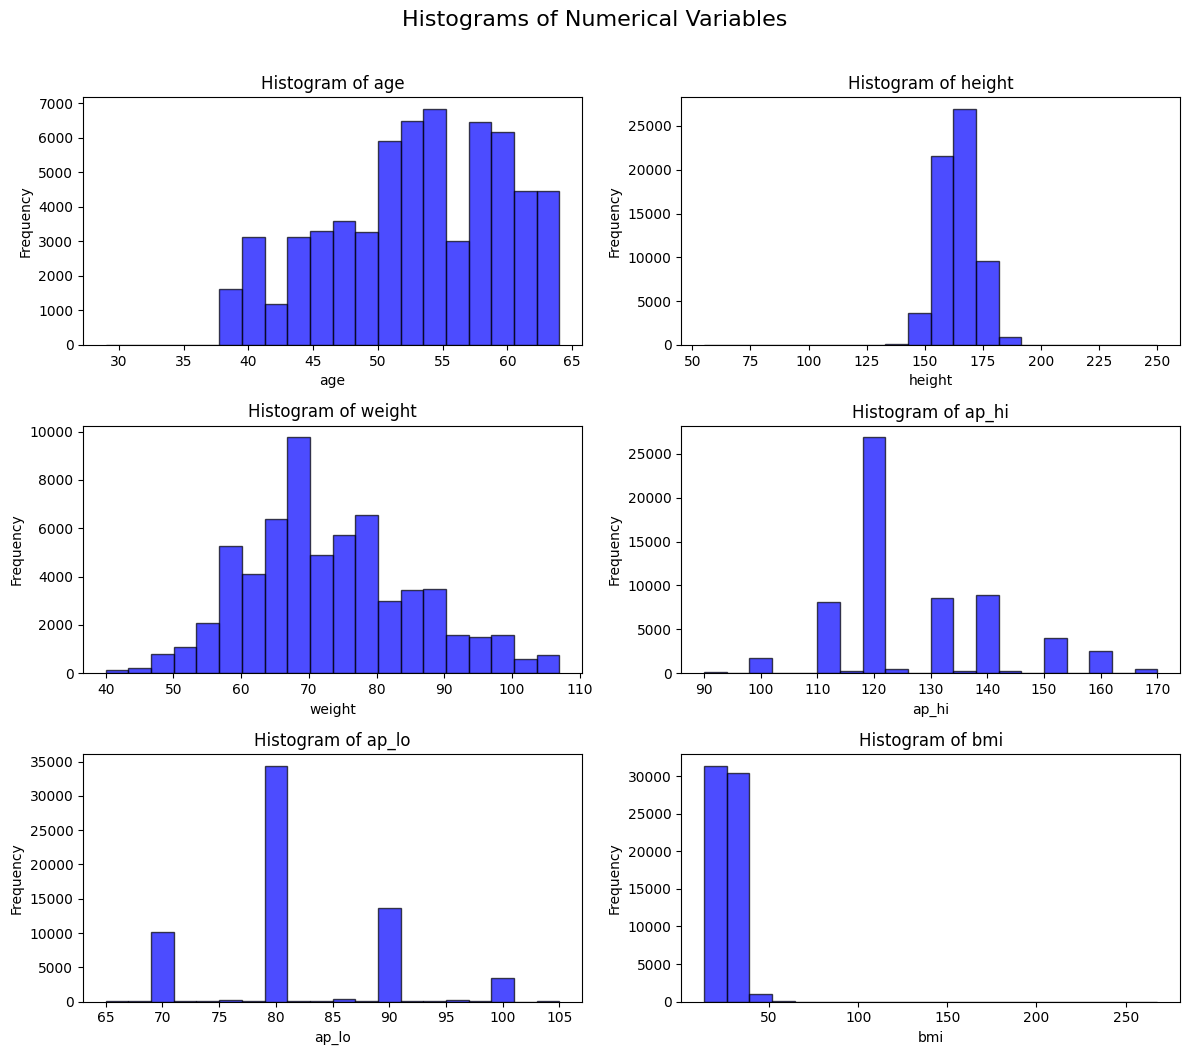

In [214]:
# Define numerical columns
numerical_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']

# Plot histograms
plt.figure(figsize=(12, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    plt.hist(df_cleaned[col], bins=20, color='blue', edgecolor='black', alpha=0.7)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.suptitle('Histograms of Numerical Variables', y=1.05, fontsize=16)
plt.show()

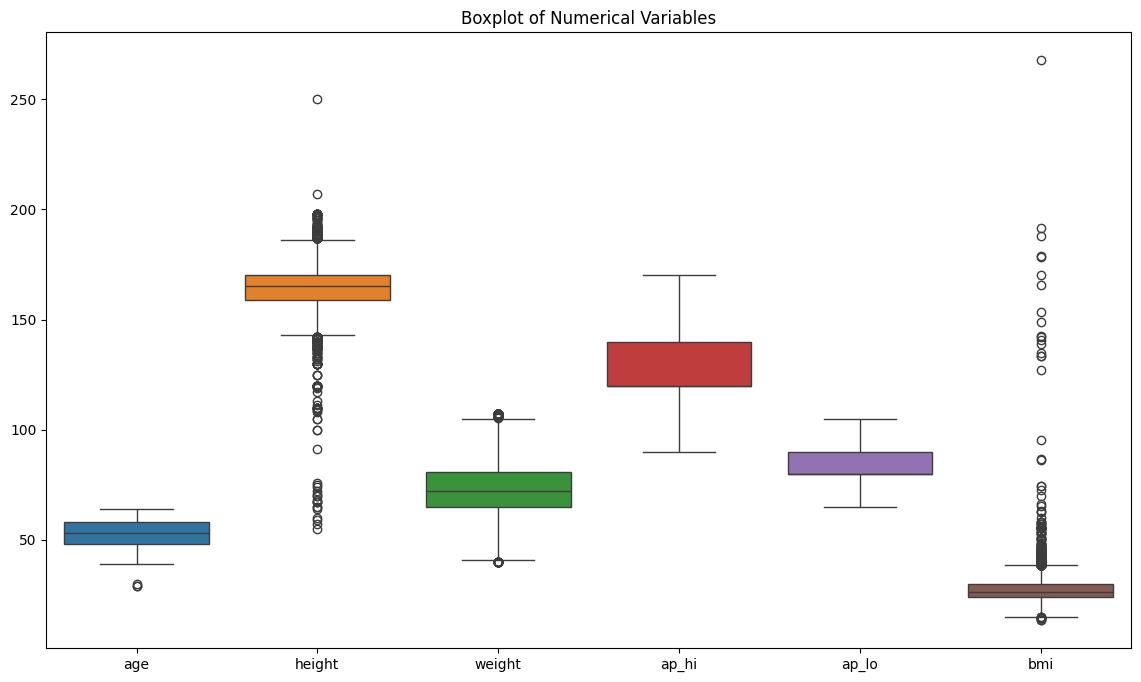

In [215]:
# Boxplot for numerical variables
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_cleaned[numerical_cols])
plt.title('Boxplot of Numerical Variables')
plt.show()

<ipython-input-216-0fcd754e5c7f>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=df_cleaned, stat='count', discrete=True, edgecolor='black', palette='husl')
<ipython-input-216-0fcd754e5c7f>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=df_cleaned, stat='count', discrete=True, edgecolor='black', palette='husl')
<ipython-input-216-0fcd754e5c7f>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=df_cleaned, stat='count', discrete=True, edgecolor='black', palette='husl')
<ipython-input-216-0fcd754e5c7f>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=col, data=df_cleaned, stat='count', discrete=True, edgecolor='black', palette='husl')
<ipython-input-216-0fcd754e5c7f>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=c

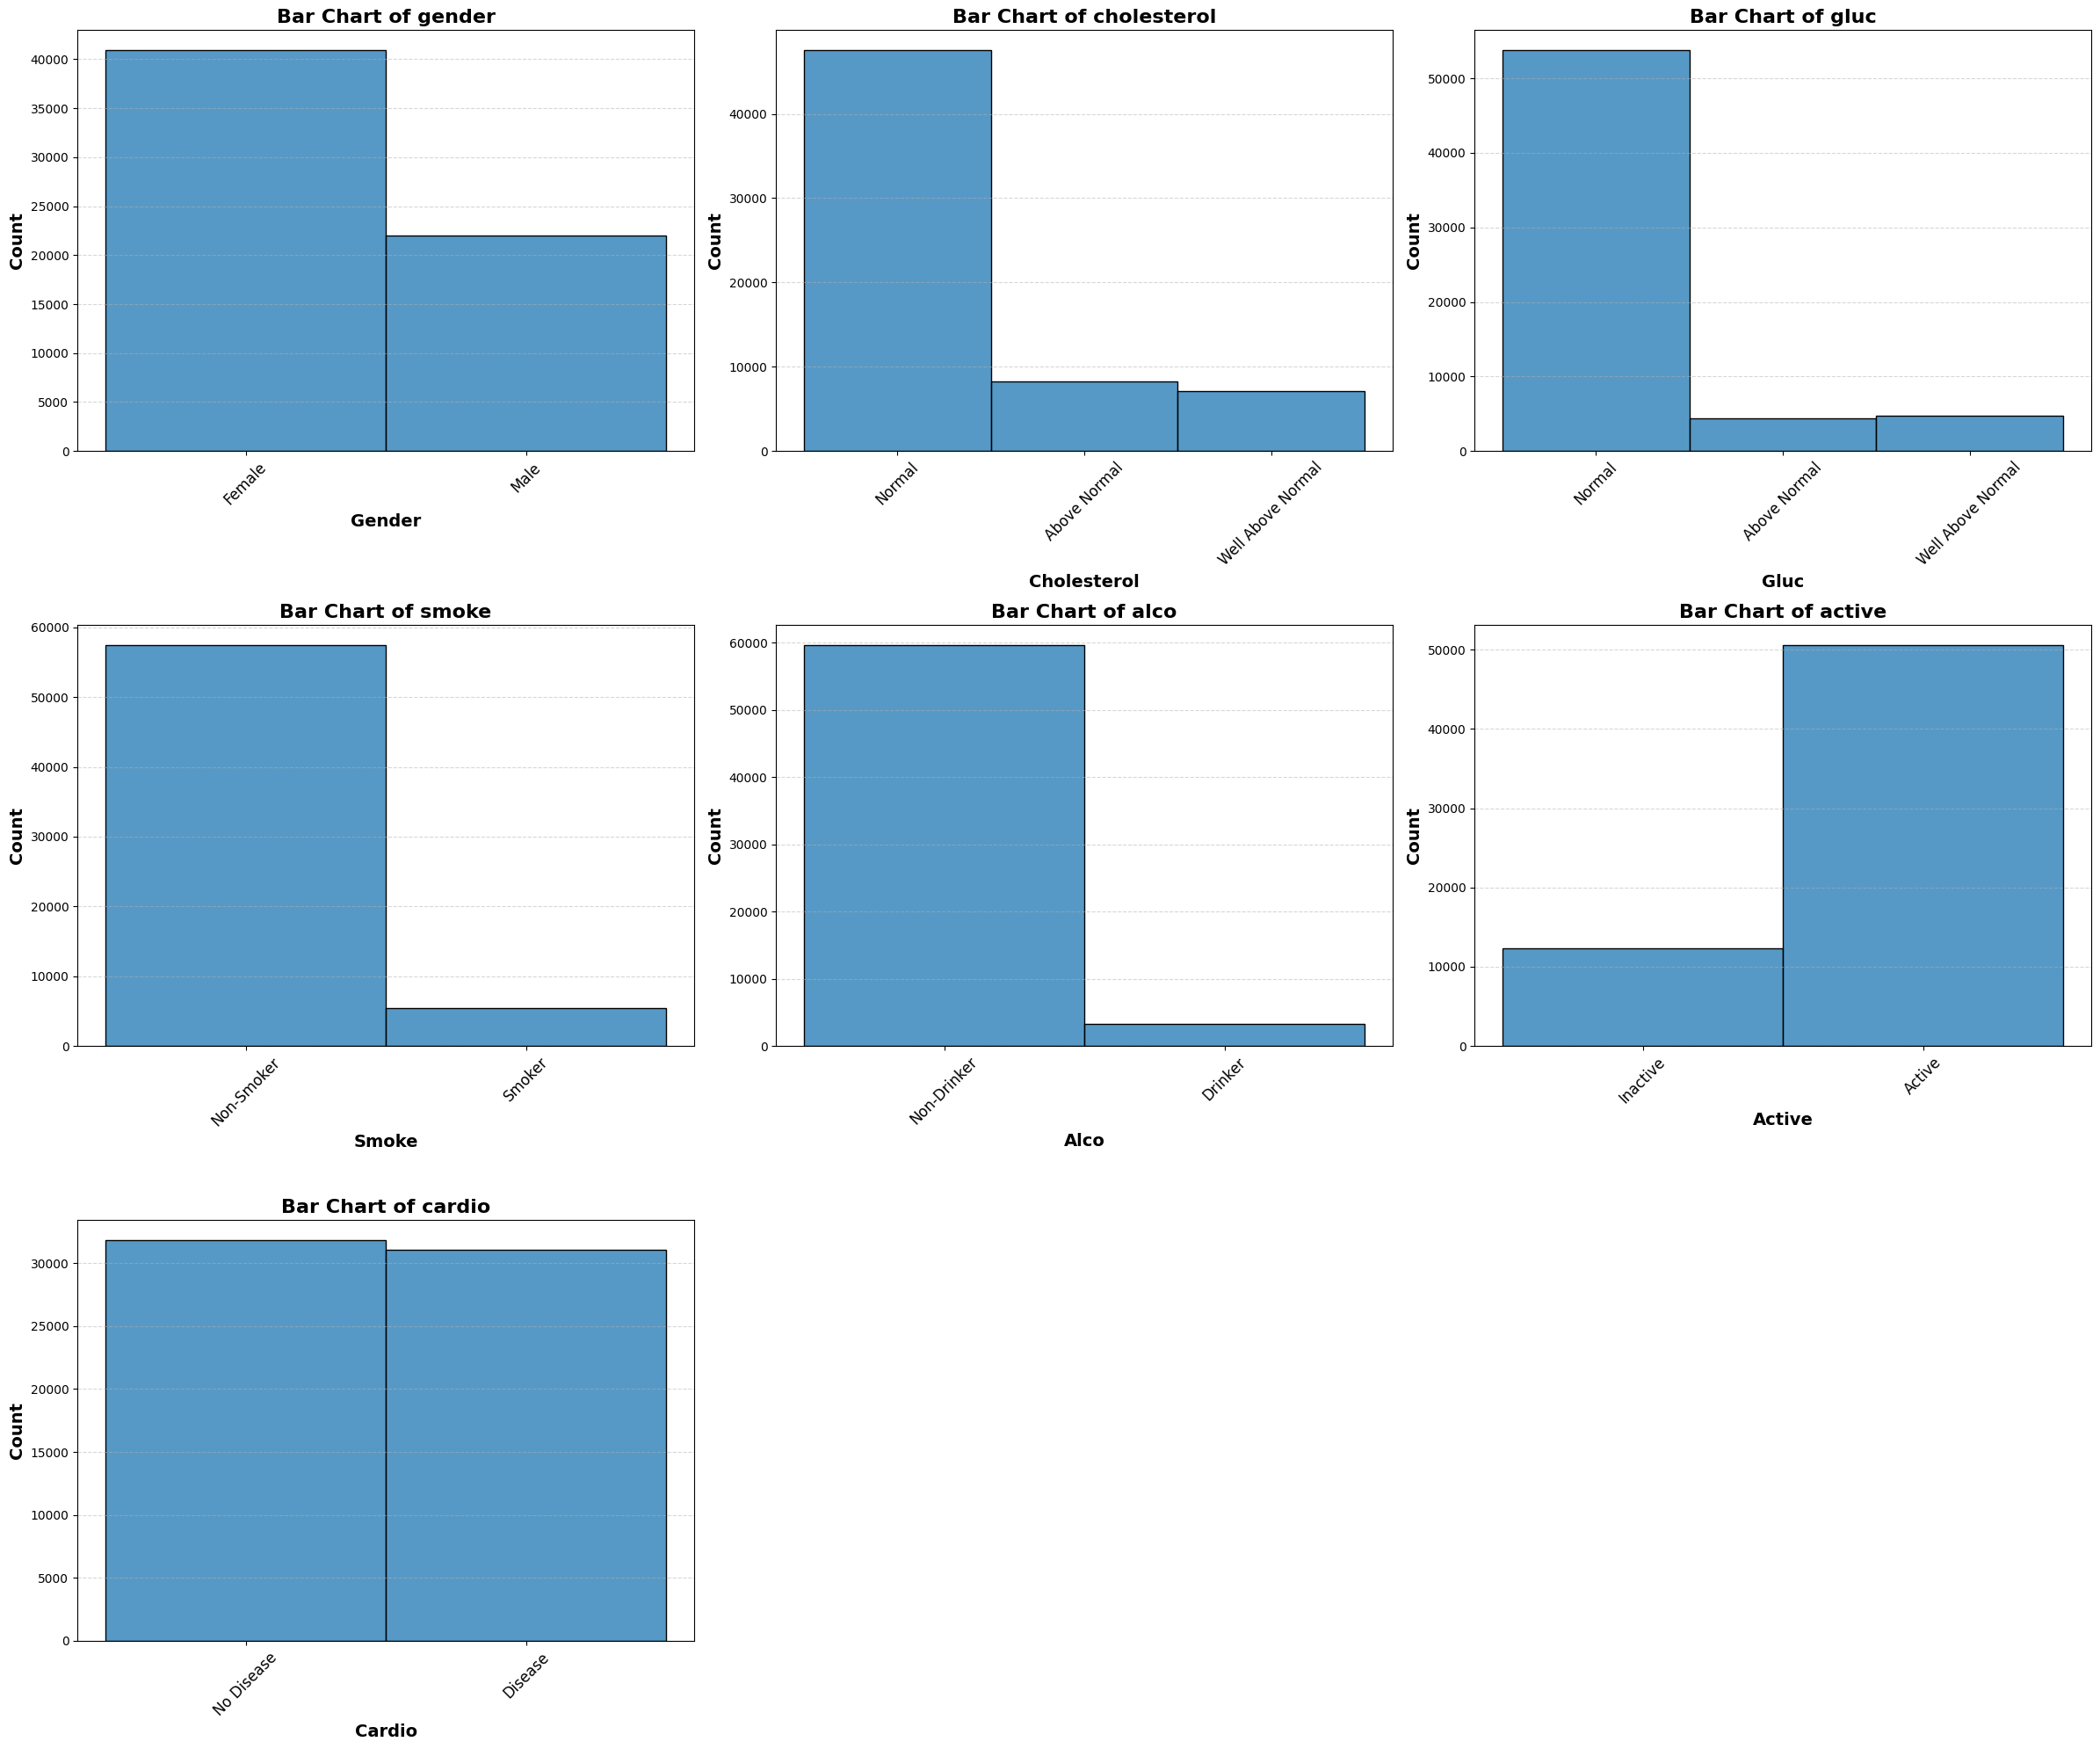

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define categorical columns
categorical_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

# Define meanings of numeric codes
code_meanings = {
    'gender': {1: 'Female', 2: 'Male'},
    'cholesterol': {1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'},
    'gluc': {1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'},
    'smoke': {0: 'Non-Smoker', 1: 'Smoker'},
    'alco': {0: 'Non-Drinker', 1: 'Drinker'},
    'active': {0: 'Inactive', 1: 'Active'},
    'cardio': {0: 'No Disease', 1: 'Disease'}
}

# Plot bar charts with a modern style
plt.figure(figsize=(24, 20))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(x=col, data=df_cleaned, stat='count', discrete=True, edgecolor='black', palette='husl')
    plt.title(f'Bar Chart of {col}', fontsize=16, fontweight='bold')
    plt.xlabel(col.capitalize(), fontsize=14, fontweight='bold')
    plt.ylabel('Count', fontsize=14, fontweight='bold')
    plt.xticks(ticks=sorted(df_cleaned[col].unique()), labels=[f"{code_meanings[col][code]}" for code in sorted(df_cleaned[col].unique())], fontsize=12, rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


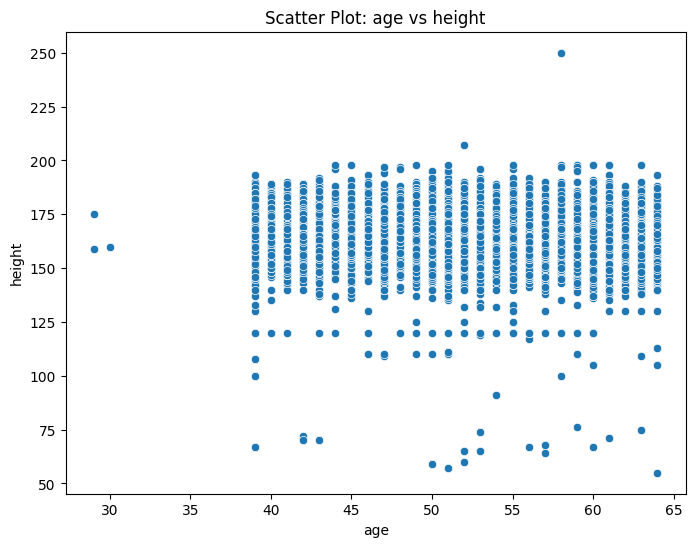

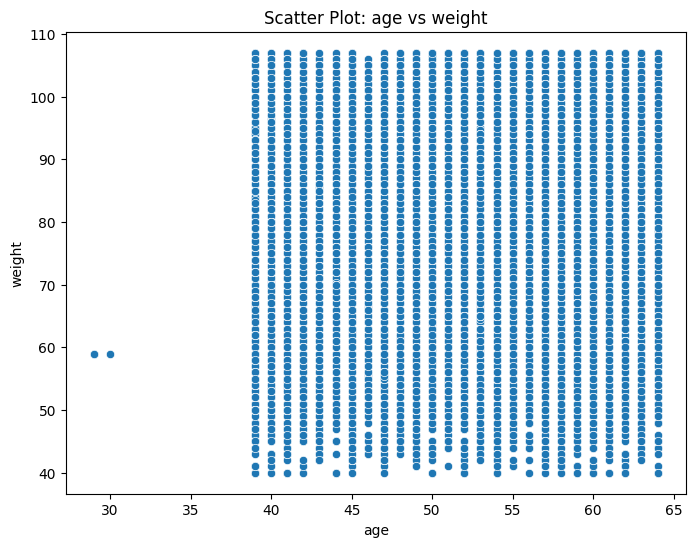

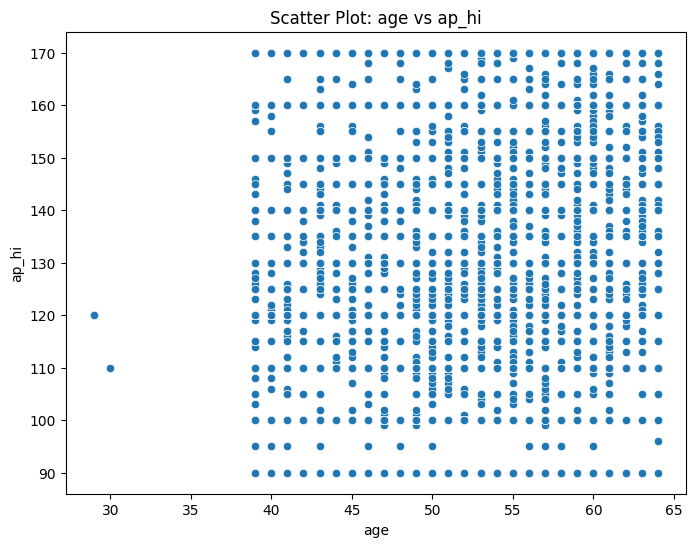

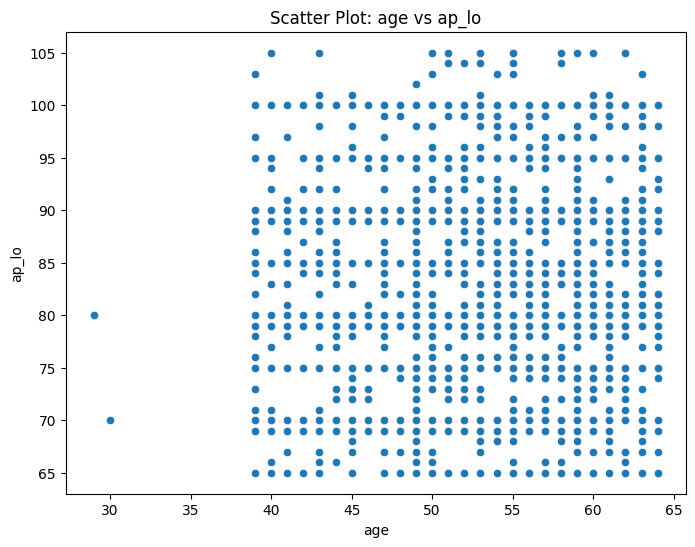

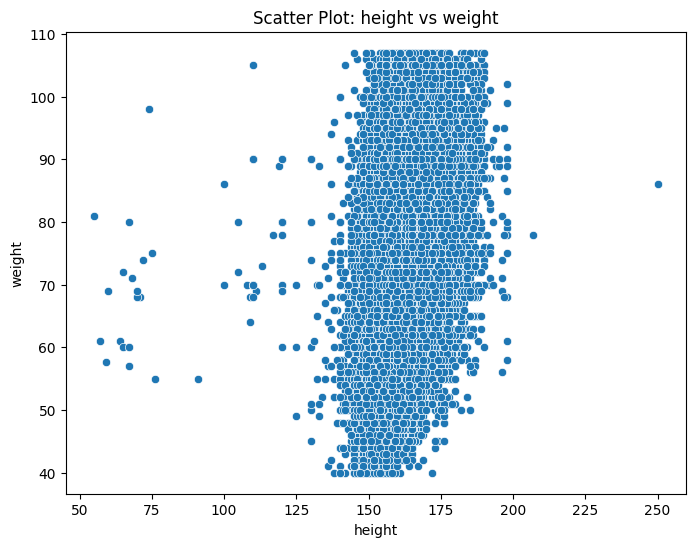

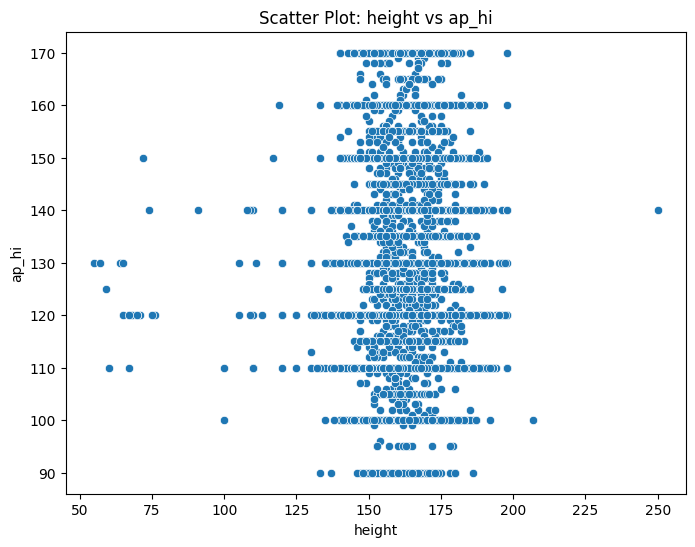

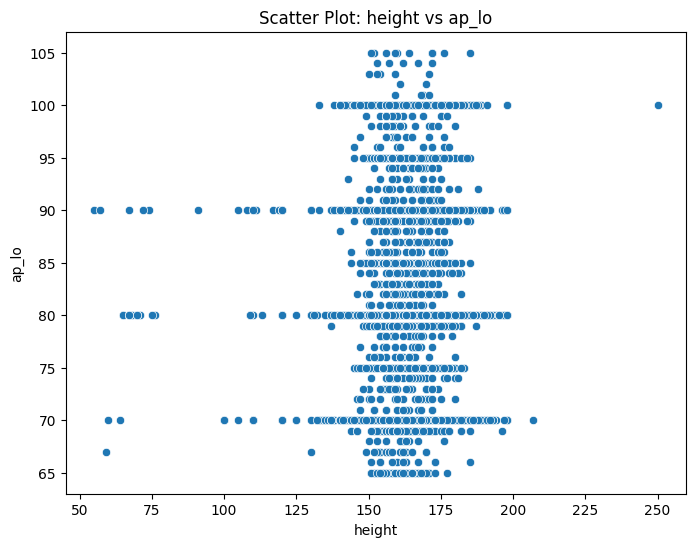

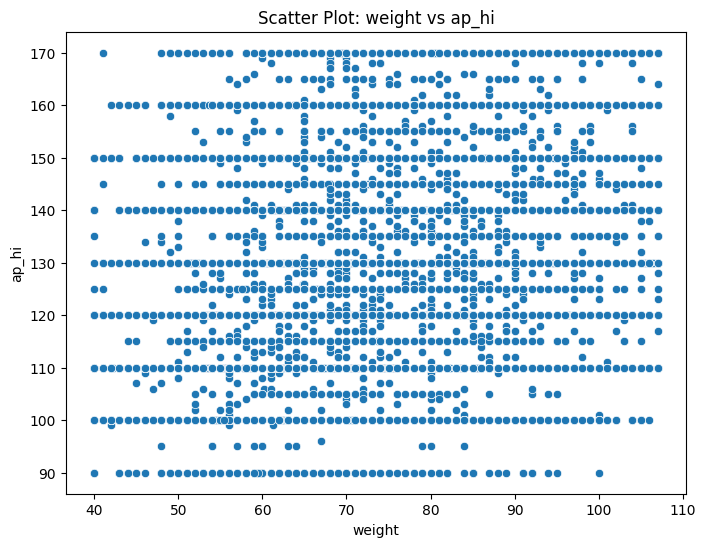

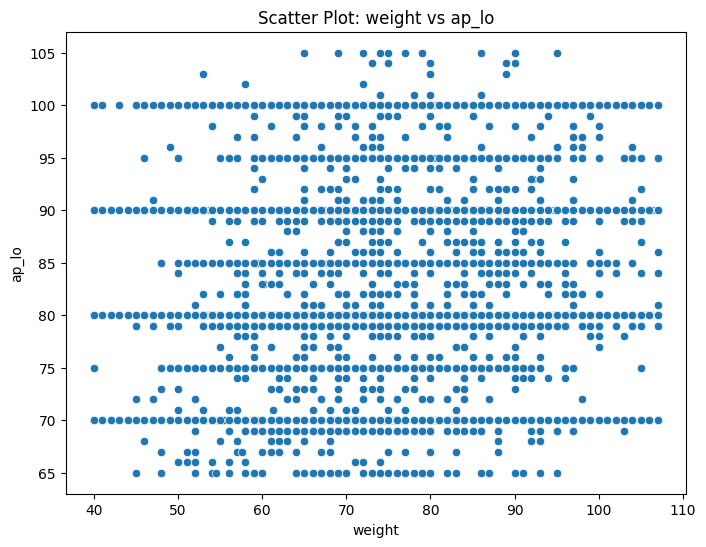

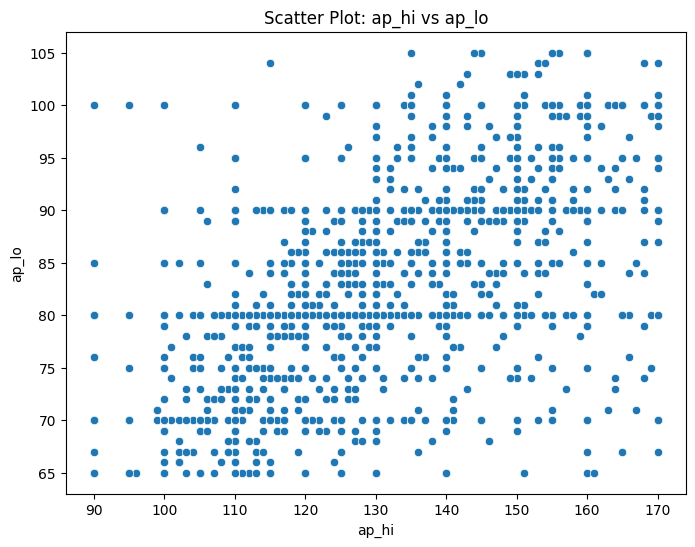

In [217]:
# Define numerical columns
numerical_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Plot pairplot for each pair of numerical variables
for i, col1 in enumerate(numerical_cols):
    for j, col2 in enumerate(numerical_cols):
        if i < j:
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=col1, y=col2, data=df_cleaned)
            plt.title(f'Scatter Plot: {col1} vs {col2}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()

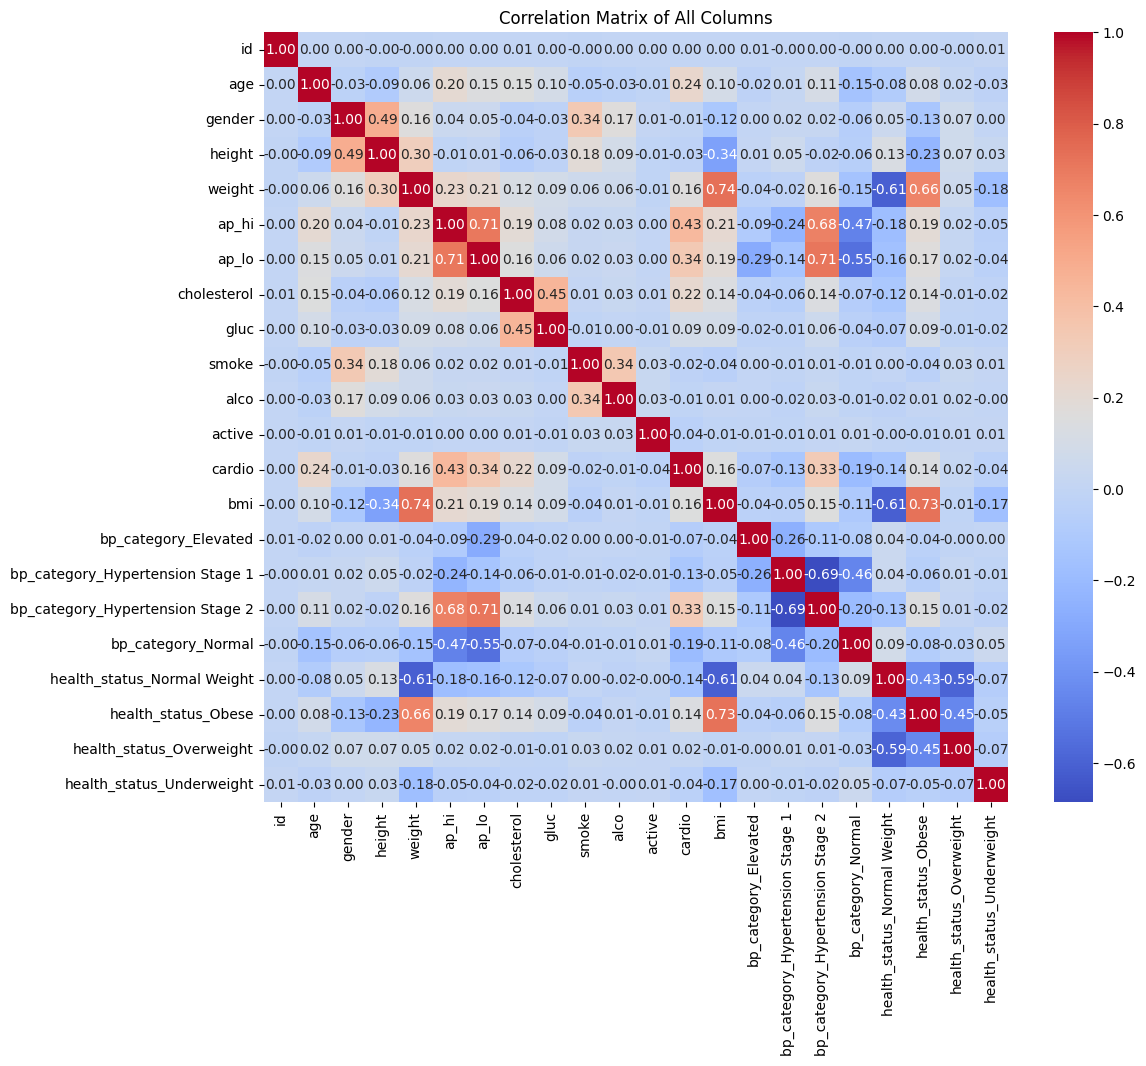

In [218]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df_cleaned)

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Columns')
plt.show()


In [219]:
# Print unique values for each column
for column in df_cleaned.columns:
    unique_values = df_cleaned[column].unique()
    print(f"Column: {column}")
    print(unique_values)
    print()

Column: id
[    0     2     3 ... 99993 99998 99999]

Column: age
[50. 51. 48. 59. 60. 61. 40. 54. 58. 45. 47. 63. 39. 53. 49. 57. 56. 55.
 64. 46. 43. 62. 52. 42. 41. 44. 29. 30.]

Column: gender
[2 1]

Column: height
[168 165 169 151 157 158 173 170 154 162 163 153 156 159 166 155 160 175
 164 178 171 152 172 148 179 180 188 185 167 183 174 176 161 184 182  76
 149 142 150 181 144 147 177 146 141 140 198 186 145 187 143 196 138 194
 190 134 136 100 120 189 137 192 250 117 119 130 110 193 191 132  71 135
  67  70 133  74 207  55  64 195  91  60 109 125 139  72 197  65 105 108
 111  68  75 113 131  59  57]

Column: weight
[ 62.    64.    82.    67.    93.    71.    80.    60.    78.    75.
  52.    68.    56.    83.    69.    90.    65.    59.    66.    74.
 105.    73.    55.    95.    70.    72.    50.   107.    84.    85.
  77.    79.    58.    97.    76.    53.    57.    49.    94.    92.
  87.   103.    88.   100.    61.    48.    54.    51.    63.    47.
  91.   104.    98.    81

#**Building Model Using RandomForestClassifier**

In [220]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'bp_category' column
df_cleaned['bp_category'] = label_encoder.fit_transform(df_cleaned['bp_category'])

In [221]:
# Split features and target variable
X = df_cleaned.drop(columns=['id', 'cardio', 'health_status'])  # Features
y = df_cleaned['cardio']  # Target variable


In [222]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [223]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [224]:
# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [225]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

**Model Evaluation**

In [226]:


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy: 0.7027972027972028
Precision: 0.7058628134861319
Recall: 0.6833896124778903
F1 Score: 0.6944444444444444


In [227]:
# Generate classification report
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      6365
           1       0.71      0.68      0.69      6219

    accuracy                           0.70     12584
   macro avg       0.70      0.70      0.70     12584
weighted avg       0.70      0.70      0.70     12584



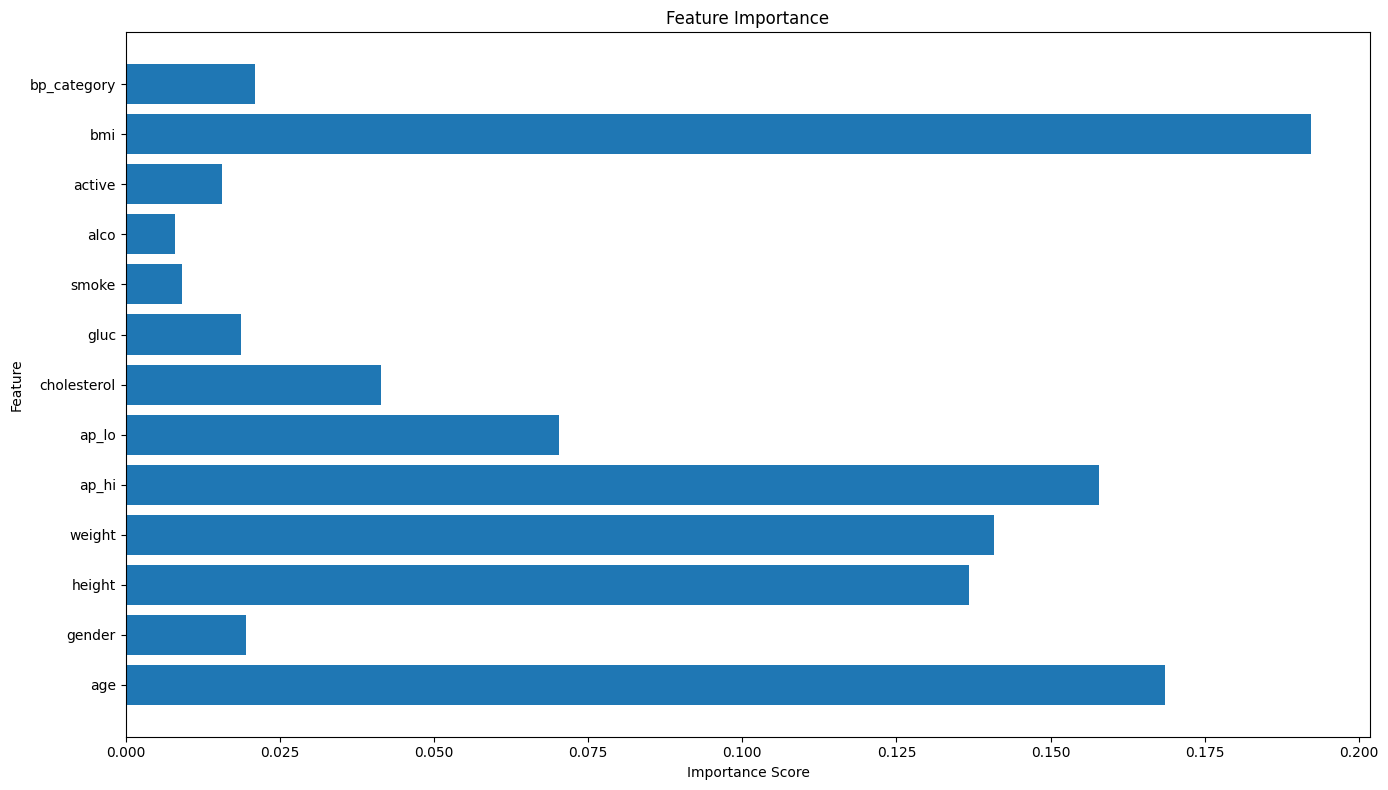

In [228]:
# Get feature importance
importances = rf_classifier.feature_importances_

# Get column names
column_names = X.columns

# Set up the plot with wider figure width
plt.figure(figsize=(14, 8))

# Create the bar plot
plt.barh(range(len(importances)), importances, tick_label=column_names)

# Set labels and title
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Show plot
plt.tight_layout()
plt.show()


# **Building Model Using GradientBoostingClassifier**

In [229]:
# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [230]:
# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

In [231]:


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy: 0.7322790845518118
Precision: 0.7515889830508474
Recall: 0.6845151953690304
F1 Score: 0.7164857359252714


In [232]:
# Generate classification report
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6365
           1       0.75      0.68      0.72      6219

    accuracy                           0.73     12584
   macro avg       0.73      0.73      0.73     12584
weighted avg       0.73      0.73      0.73     12584



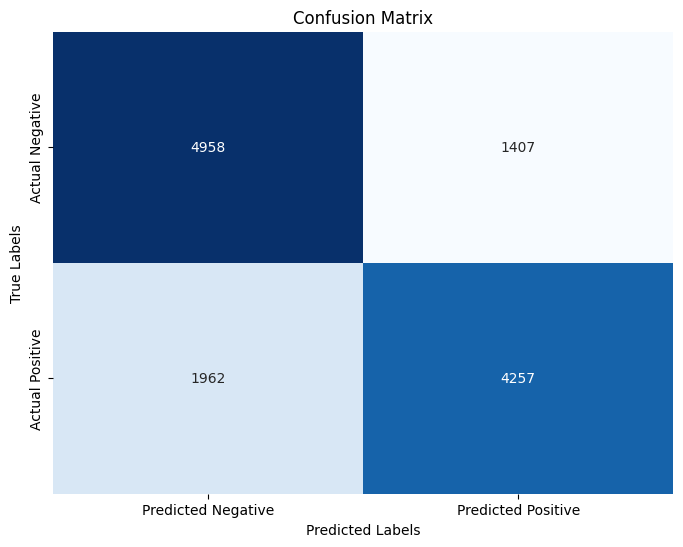

In [233]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Set labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Predicted Negative', 'Predicted Positive'])
plt.yticks(ticks=[0.5, 1.5], labels=['Actual Negative', 'Actual Positive'])

# Show the plot
plt.show()


# **Building Model Using Logistic Regression Classifier**

In [234]:
# Logistic Regression Classifier
logreg_classifier = LogisticRegression(max_iter=1000, random_state=42)
logreg_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [235]:
# Make predictions on the test set
y_pred = logreg_classifier.predict(X_test)

In [236]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy: 0.7247298156389066
Precision: 0.7612364877678741
Recall: 0.6454413892908828
F1 Score: 0.6985729202923773


# **Building Model Using K-Nearest Neighbors (KNN) Classifier**

In [247]:
# K-Nearest Neighbors (KNN) Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=10)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [248]:
# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

In [249]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy: 0.7031150667514304
Precision: 0.7409276149815641
Recall: 0.6139250683389612
F1 Score: 0.6714737952866691
